In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from func.EI_calculation import local_ei_cell
from func.EI_calculation import homo_ca_ei
from ca_generate import cellular_automaton_homo
from ca_generate import cellular_automaton2
plt.rcParams['figure.figsize'] = (15, 12)
%matplotlib inline

# 已知动力学 动力学异质 噪音不同

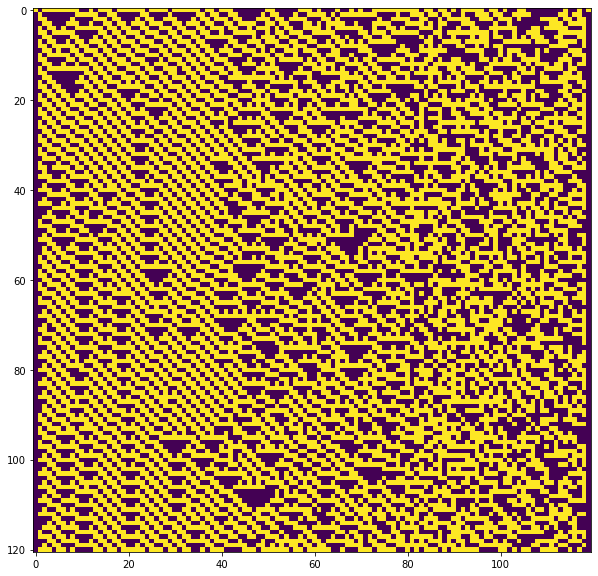

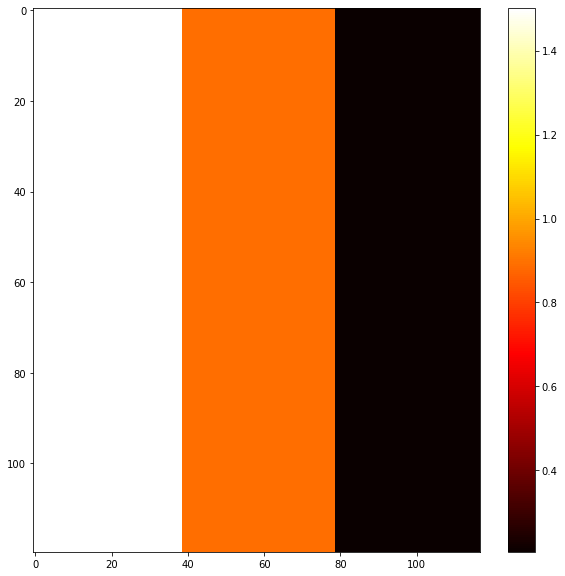

In [2]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton_homo(rule=110, generations=120, p0_list=[0.01,0.1,0.3], size=120,middle_size=2)
#

# 已知动力学 动力学异质 f不同

In [7]:
from ca_generate import generate_markov
cell_ei_list=[]
middle_size = 1
for rule in range(256):
    markov_m = generate_markov(p0=0, rule=rule, middle_size=middle_size)
    ei = homo_ca_ei(markov_m,middle_size)
    print('rule = '+str(rule)+' ei ='+str(ei))
    cell_ei_list.append(ei)

cell_ei_list

rule = 0 ei =0.0
rule = 1 ei =0.25
rule = 2 ei =0.25
rule = 3 ei =0.5
rule = 4 ei =0.25
rule = 5 ei =0.0
rule = 6 ei =0.5
rule = 7 ei =0.25
rule = 8 ei =0.25
rule = 9 ei =0.5
rule = 10 ei =0.0
rule = 11 ei =0.25
rule = 12 ei =0.5
rule = 13 ei =0.25
rule = 14 ei =0.25
rule = 15 ei =0.0
rule = 16 ei =0.25
rule = 17 ei =0.5
rule = 18 ei =0.5
rule = 19 ei =0.75
rule = 20 ei =0.5
rule = 21 ei =0.25
rule = 22 ei =0.75
rule = 23 ei =0.5
rule = 24 ei =0.5
rule = 25 ei =0.75
rule = 26 ei =0.25
rule = 27 ei =0.5
rule = 28 ei =0.75
rule = 29 ei =0.5
rule = 30 ei =0.5
rule = 31 ei =0.25
rule = 32 ei =0.25
rule = 33 ei =0.5
rule = 34 ei =0.5
rule = 35 ei =0.75
rule = 36 ei =0.5
rule = 37 ei =0.25
rule = 38 ei =0.75
rule = 39 ei =0.5
rule = 40 ei =0.5
rule = 41 ei =0.75
rule = 42 ei =0.25
rule = 43 ei =0.5
rule = 44 ei =0.75
rule = 45 ei =0.5
rule = 46 ei =0.5
rule = 47 ei =0.25
rule = 48 ei =0.5
rule = 49 ei =0.75
rule = 50 ei =0.75
rule = 51 ei =1.0
rule = 52 ei =0.75
rule = 53 ei =0.5
rule = 54 e

[0.0,
 0.25,
 0.25,
 0.5,
 0.25,
 0.0,
 0.5,
 0.25,
 0.25,
 0.5,
 0.0,
 0.25,
 0.5,
 0.25,
 0.25,
 0.0,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.5,
 0.75,
 0.75,
 1.0,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 1.0,
 0.5,
 0.75,
 1.0,
 0.75,
 0.75,
 0.5,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.0,
 0.25,
 0.25,
 0.5,
 0.25,
 0.0,
 0.5,
 0.25,
 0.25,
 0.5,
 0.0,
 0.25,
 0.5,
 0.25,
 0.25,
 0.0,
 0.5,
 0.75,
 0.75,
 1.0,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 1.0,
 0.5,
 0.75,
 1.0,
 0.75,
 0.75,
 0.5,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.5,
 0.75,
 0.75,
 1.0,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 1.0,

In [ ]:
51,54,57,60,99,102,105,108,147,150,153,156,198,

In [12]:
ca_classification.values()

dict_values([[8, 0, 32, 40, 128, 136, 160, 168], [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 72, 73, 74, 76, 77, 78, 94, 104, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 200, 204, 232], [18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150], [41, 54, 106, 110]])

In [14]:
#woframe
ca_classification = {
    'Class I': [8, 0, 32, 40, 128, 136, 160, 168],
    'Class II': [
        1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 
        19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 
        37, 38, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 
        72, 73, 74, 76, 77, 78, 94, 104, 108, 130, 132, 
        134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 
        172, 178, 184, 200, 204, 232
    ],
    'Class III': [
        18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150
    ],
    'Class IV': [41, 54, 106, 110]
}

class_name_to_num = {
    'Class I': 1,
    'Class II': 2,
    'Class III': 3,
    'Class IV': 4
}

class_of_rules = np.zeros(256)

for number in range(256):
    for class_name, numbers in ca_classification.items():
            if number in numbers:
                class_of_rules[number] = class_name_to_num[class_name]

class_of_rules

array([1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 3., 2., 0., 0., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 1., 2.,
       2., 2., 2., 2., 2., 0., 1., 4., 2., 2., 2., 3., 2., 0., 0., 0., 2.,
       2., 0., 0., 4., 0., 2., 2., 2., 0., 3., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 3., 4., 0., 2., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3., 0., 0., 0., 3., 0., 1., 0., 2., 0., 2., 0., 2., 0.,
       1., 0., 2., 0., 2., 0., 2., 0., 0., 0., 3., 0., 0., 0., 3., 0., 2.,
       0., 2., 0., 2., 0., 0., 0., 1., 0., 2., 0., 2., 0., 0., 0., 1., 0.,
       2., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

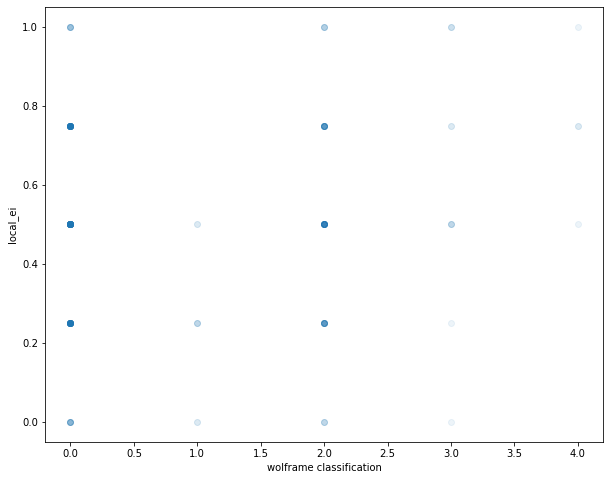

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(class_of_rules, np.array(cell_ei_list), alpha=0.08)
#plt.scatter(range(256), , label = 'class', alpha=0.25)
#plt.legend()
plt.xlabel('wolframe classification')
plt.ylabel('local_ei')
plt.show()

In [6]:
cell_ei_list[250],cell_ei_list[108],cell_ei_list[90],cell_ei_list[110]

(0.0, 1.0, 0.0, 0.75)

# 已知动力学 动力学同质

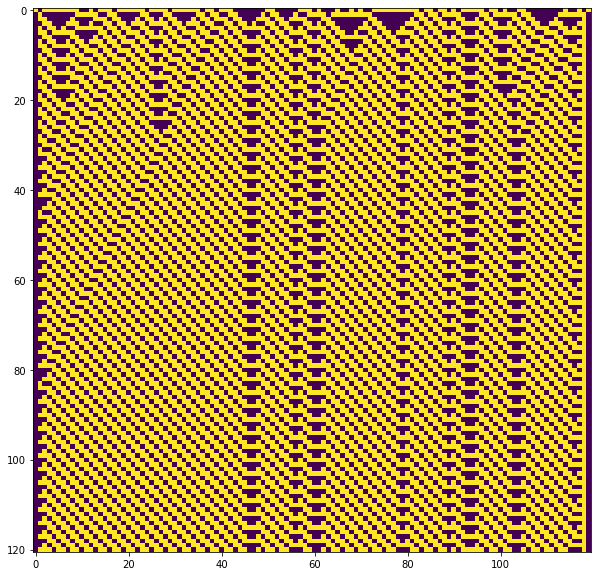

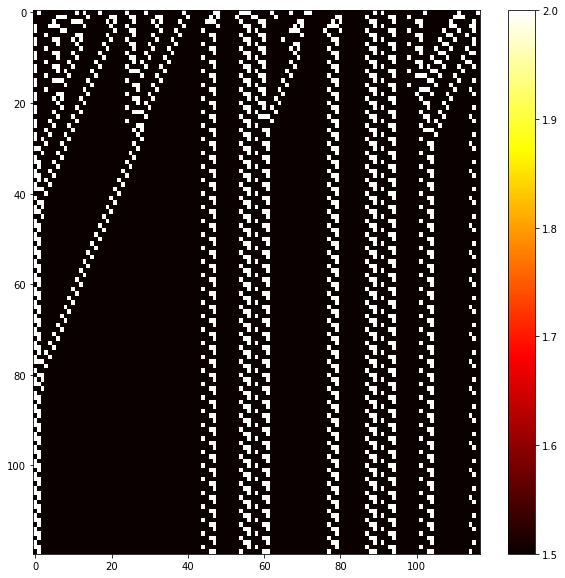

In [3]:

seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton2(rule=110, generations=120, p0_list=[0], size=120, middle_size=2)


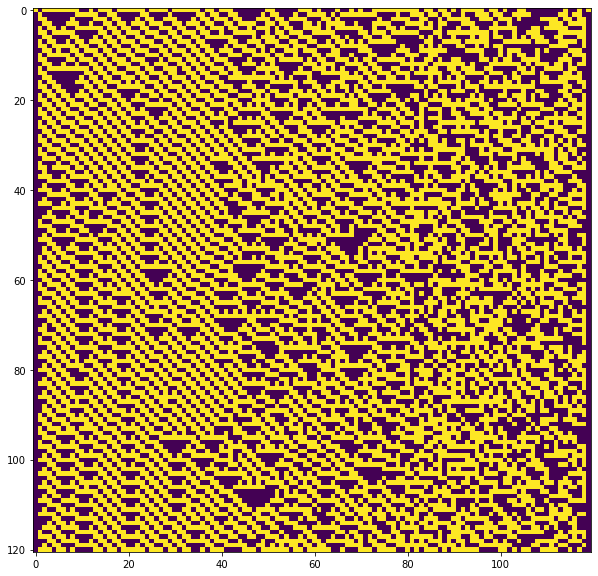

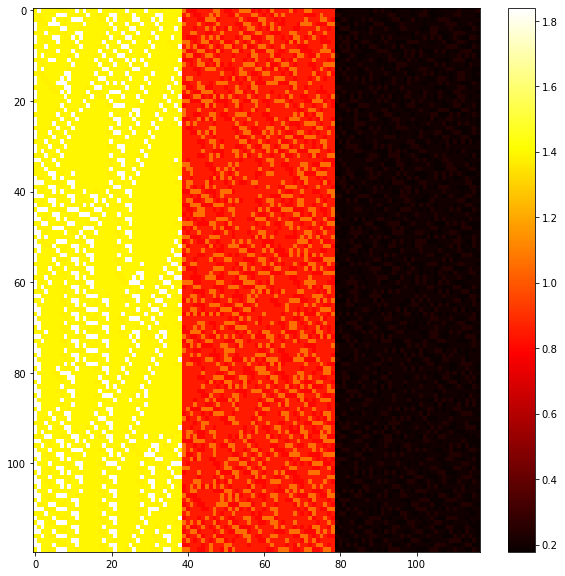

In [4]:

seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton2(rule=110, generations=120, p0_list=[0.01,0.1,0.3], size=120, middle_size=2)


# 已知动力学 动力学异质 时空噪声

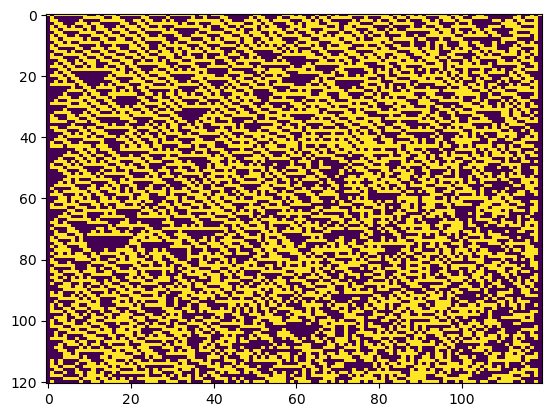

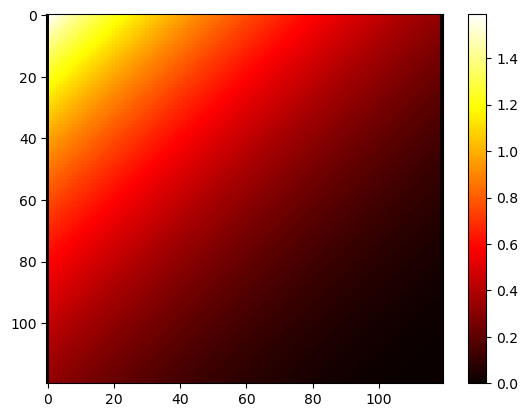

In [2]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton_2d(rule=110, generations=120,  size=120, middle_size=2)